In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Scaler library
from sklearn.preprocessing import StandardScaler

#Clustering 
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

#CART RF
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Import stats from scipy
from scipy import stats

# Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

## Data Dictionary for Market Segmentation:

spending:                     Amount spent by the customer per month (in 1000s) \
advance_payments:             Amount paid by the customer in advance by cash (in 100s) \
probability_of_full_payment:  Probability of payment done in full by the customer to the bank \
current_balance:              Balance amount left in the account to make purchases (in 1000s) \
credit_limit:                 Limit of the amount in credit card (10000s) \
min_payment_amt :             Minimum paid by the customer while making payments for purchases made monthly (in 100s) \
max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

## 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [2]:
CustomerData = pd.read_csv("bank_marketing_part1_Data.csv")

In [3]:
CustomerData.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
CustomerData.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [6]:
CustomerData[CustomerData.duplicated() == True]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


Univariate analysis

In [7]:
lstNumeric = list(CustomerData.select_dtypes(exclude='object').columns)
lstNumeric

['spending',
 'advance_payments',
 'probability_of_full_payment',
 'current_balance',
 'credit_limit',
 'min_payment_amt',
 'max_spent_in_single_shopping']

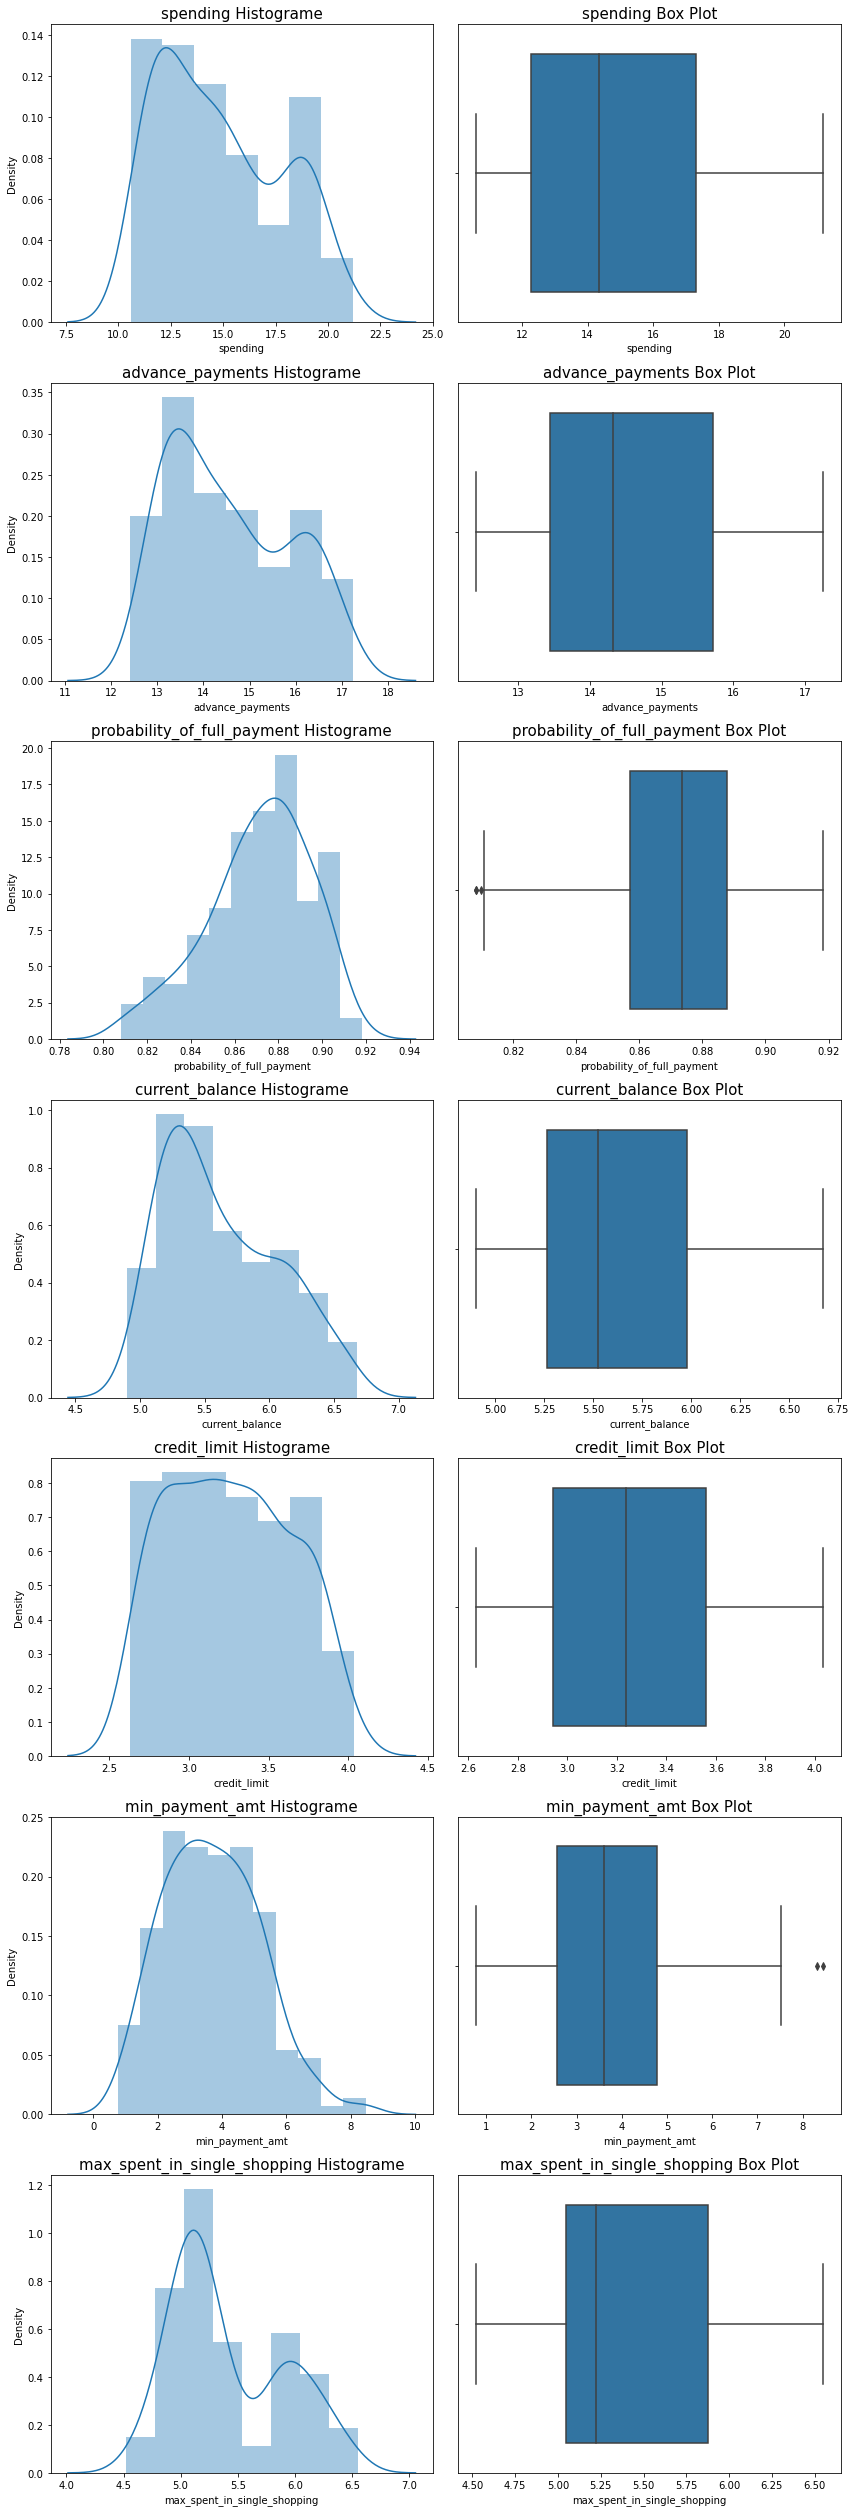

In [8]:
## Univariate except Name column
fig, axes = plt.subplots(nrows= len(lstNumeric),ncols=2)
fig.set_size_inches(12, 5*len(lstNumeric))
index = 0;
for i in lstNumeric:
    a = sns.distplot(CustomerData[i] , ax=axes[index][0])
    a.set_title(i + ' Histograme',fontsize=15)
    a = sns.boxplot(CustomerData[i] , ax=axes[index][1])
    a.set_title(i + ' Box Plot',fontsize=15)
    index = index+1
plt.tight_layout()
plt.show()

Multivariate Analalysis

### Corellation 

In [9]:
CustomerData[lstNumeric].corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


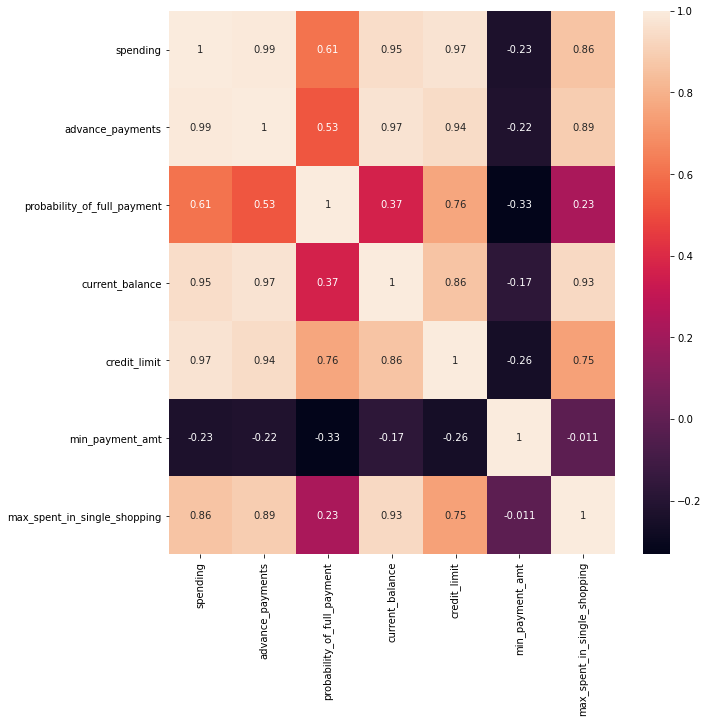

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(CustomerData[lstNumeric].corr(),annot=True)
plt.show()

### Standardization  of data

As we can see from summery of description, scale of each variables as well as some variables have different units. Standardization is necessary in cluster analysis because groups are defined based on the distance between points in mathematicalspace.

In [11]:
X = StandardScaler()

In [12]:
CustomerData_Scaled = X.fit_transform(CustomerData)

In [13]:
CustomerData_Scaled

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [14]:
CustomerData_Scaled = pd.DataFrame(CustomerData_Scaled, index=CustomerData.index, columns=CustomerData.columns)
CustomerData_Scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [15]:
CustomerData_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,9.148766e-16,1.002389,-1.466714,-0.887955,-0.169674,0.846599,2.181534
advance_payments,210.0,1.097006e-16,1.002389,-1.649686,-0.851433,-0.183664,0.887069,2.065260
probability_of_full_payment,210.0,1.243978e-15,1.002389,-2.668236,-0.598079,0.103993,0.711677,2.006586
current_balance,210.0,-1.089076e-16,1.002389,-1.650501,-0.828682,-0.237628,0.794595,2.367533
credit_limit,210.0,-2.994298e-16,1.002389,-1.668209,-0.834907,-0.057335,0.804496,2.055112
min_payment_amt,210.0,5.302637e-16,1.002389,-1.956769,-0.759148,-0.067469,0.712379,3.170590
max_spent_in_single_shopping,210.0,-1.935489e-15,1.002389,-1.813288,-0.740495,-0.377459,0.956394,2.328998


## hierarchical clustering

In [16]:
wardlink = linkage(CustomerData_Scaled, method = 'ward')

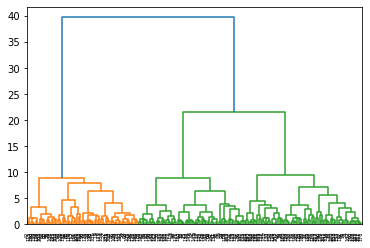

In [17]:
dend = dendrogram(wardlink)

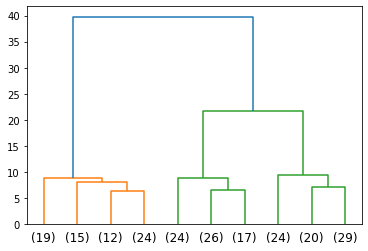

In [18]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

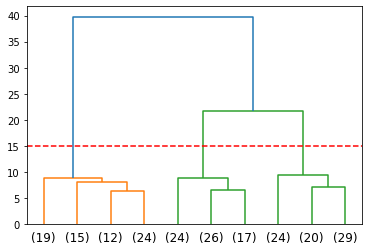

In [19]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )
plt.axhline(y=15, color='r', linestyle='--')
plt.show()

In [20]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
print(clusters)

[1 3 1 2 1 2 2 3 1 2 1 3 2 1 3 2 3 2 3 2 2 2 1 2 3 1 3 2 2 2 3 2 2 3 2 2 2
 2 2 1 1 3 1 1 2 2 3 1 1 1 2 1 1 1 1 1 2 2 2 1 3 2 2 3 3 1 1 3 1 2 3 2 1 1
 2 1 3 2 1 3 3 3 3 1 2 3 3 1 1 2 3 1 3 2 2 1 1 1 2 1 2 1 3 1 3 1 1 2 2 1 3
 3 1 2 2 1 3 3 2 1 3 2 2 2 3 3 1 2 3 3 2 3 3 1 2 1 1 2 1 3 3 3 2 2 3 2 1 2
 3 2 3 2 3 3 3 3 3 2 3 1 1 2 1 1 1 2 1 3 3 3 3 2 3 1 1 1 3 3 1 2 3 3 3 3 1
 1 3 3 3 2 3 3 2 1 3 1 1 2 1 2 3 1 3 2 1 3 1 3 1 3]


In [21]:
CustomerData['H_clusters'] = clusters

In [22]:
CustomerData.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


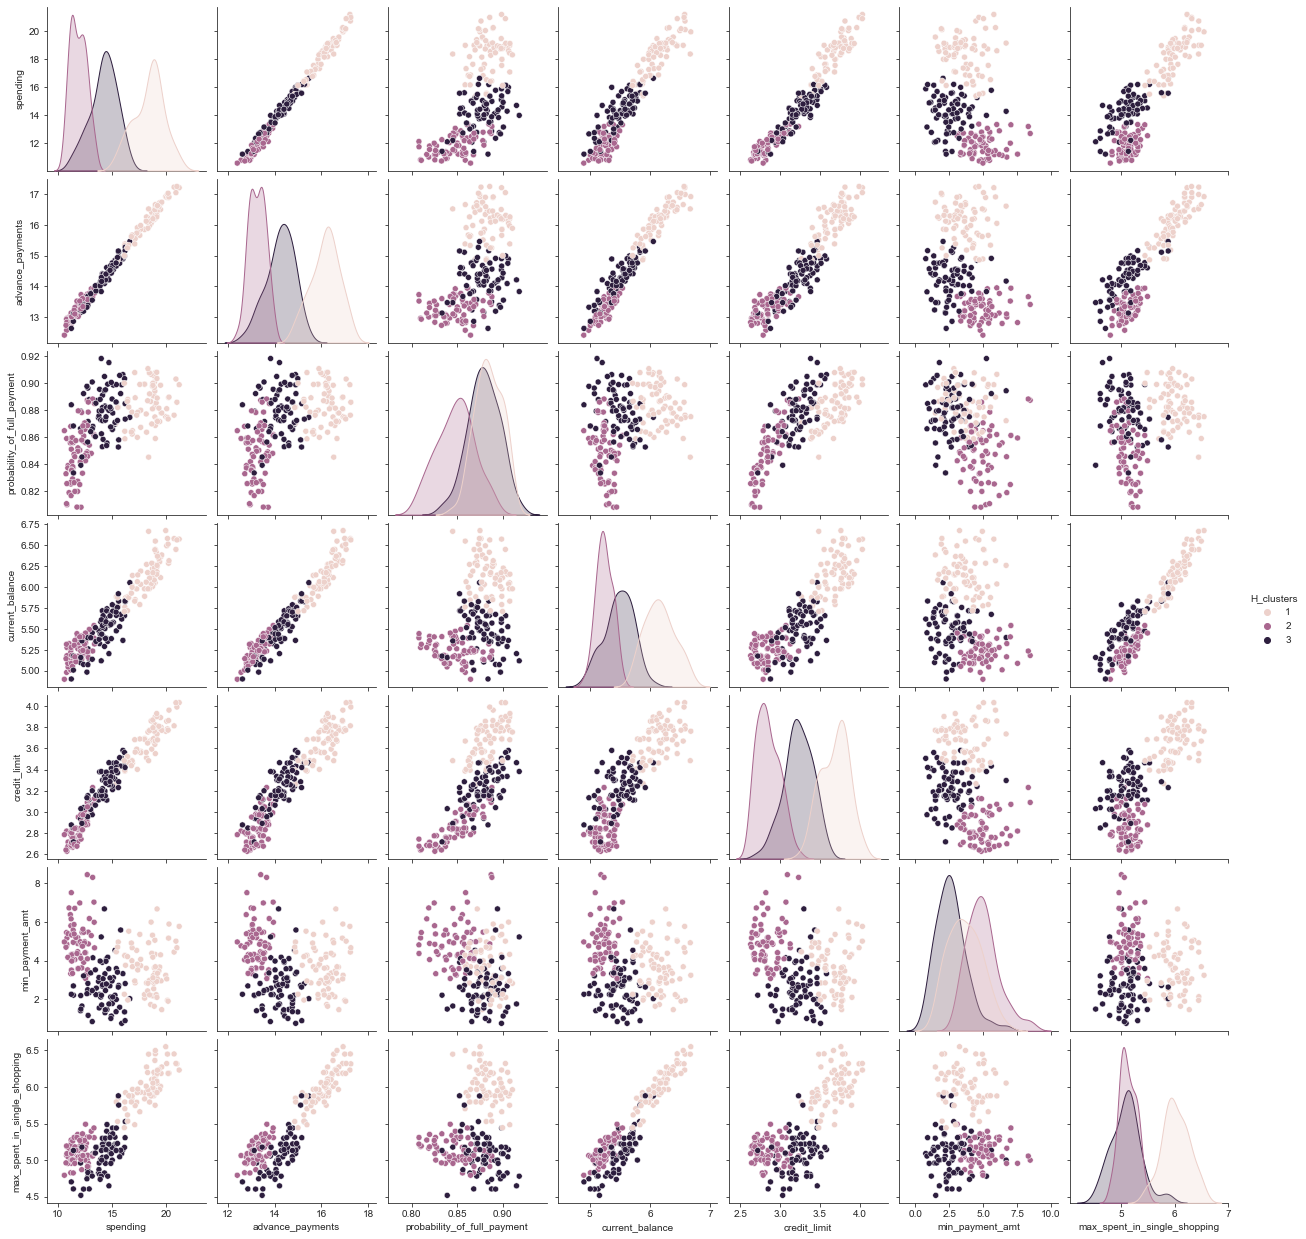

In [23]:
sns.set_style("ticks");
sns.pairplot(CustomerData, hue="H_clusters");
plt.show()

## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve. Explain the results properly. Interpret and write inferences on the finalized clusters. 

In [24]:
k_means2 = KMeans(n_clusters = 2)
k_means2.fit(CustomerData_Scaled)
k_means2.labels_

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [25]:
k_means2.inertia_

659.1717544870411

In [26]:
k_means2 = KMeans(n_clusters = 3)
k_means2.fit(CustomerData_Scaled)
k_means2.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [27]:
k_means2.inertia_

430.65897315130064

### WSS curve

In [28]:
wss =[] 
K = range(1,20)
for i in K:
    KM = KMeans(n_clusters=i)
    KM.fit(CustomerData_Scaled)
    wss.append(KM.inertia_)

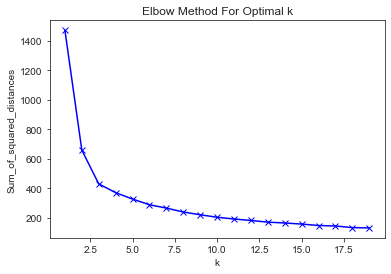

In [29]:
plt.plot(K, wss, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### In the plot above the elbow is at $k=6$ indicating the optimal k for this dataset is $6$ after which distance is almost converged which is in agreement to the hierarchical clustering!

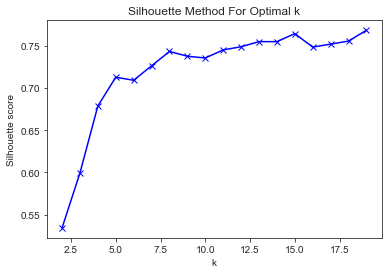

In [30]:
### SILHOUTTE METHOD ###

S = []
K = range(2,20)
for k in K:
    km = KMeans(n_clusters=k, random_state=10)
    df_labels = km.fit_predict(CustomerData_Scaled)
    sc = 1-silhouette_score(CustomerData_Scaled, df_labels)
    S.append(sc)

plt.plot(K, S, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method For Optimal k')
plt.show()

#### Here also we see that $k=6$ is the optimum number of clusters after which silhouette score is converged! So our finalised number of clusters are $6$.

In [31]:
k_means4 = KMeans(n_clusters = 6)
k_means4.fit(CustomerData_Scaled)
labels_4 = k_means4.labels_
labels_4

array([4, 3, 4, 2, 4, 5, 2, 3, 4, 2, 4, 3, 2, 4, 1, 5, 3, 2, 1, 1, 1, 2,
       4, 1, 3, 0, 1, 2, 2, 5, 3, 1, 1, 3, 2, 2, 2, 5, 2, 4, 4, 3, 0, 4,
       2, 1, 1, 4, 4, 4, 1, 4, 4, 4, 4, 0, 5, 2, 2, 4, 3, 2, 2, 0, 3, 4,
       4, 3, 4, 1, 3, 1, 4, 4, 5, 4, 3, 2, 0, 3, 3, 1, 3, 4, 2, 0, 0, 0,
       0, 5, 5, 4, 3, 2, 1, 4, 4, 0, 2, 0, 5, 4, 3, 4, 3, 4, 4, 5, 5, 4,
       0, 3, 4, 5, 2, 0, 3, 5, 2, 4, 1, 2, 5, 1, 3, 3, 4, 2, 3, 3, 2, 3,
       1, 4, 2, 0, 4, 1, 0, 3, 5, 3, 2, 1, 1, 2, 4, 2, 3, 2, 3, 1, 3, 0,
       1, 3, 1, 2, 3, 0, 4, 1, 4, 0, 4, 2, 0, 3, 1, 1, 3, 2, 3, 4, 4, 4,
       3, 1, 0, 2, 3, 1, 1, 3, 0, 0, 1, 3, 3, 2, 1, 3, 2, 4, 3, 0, 4, 5,
       4, 2, 3, 0, 3, 2, 0, 3, 0, 3, 3, 0])

In [32]:
CustomerData['Kmeans_clusters'] = labels_4

In [33]:
CustomerData.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,Kmeans_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,4
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,4
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,4


In [34]:
CustomerData.Kmeans_clusters.value_counts()

3    48
4    48
2    39
1    32
0    27
5    16
Name: Kmeans_clusters, dtype: int64

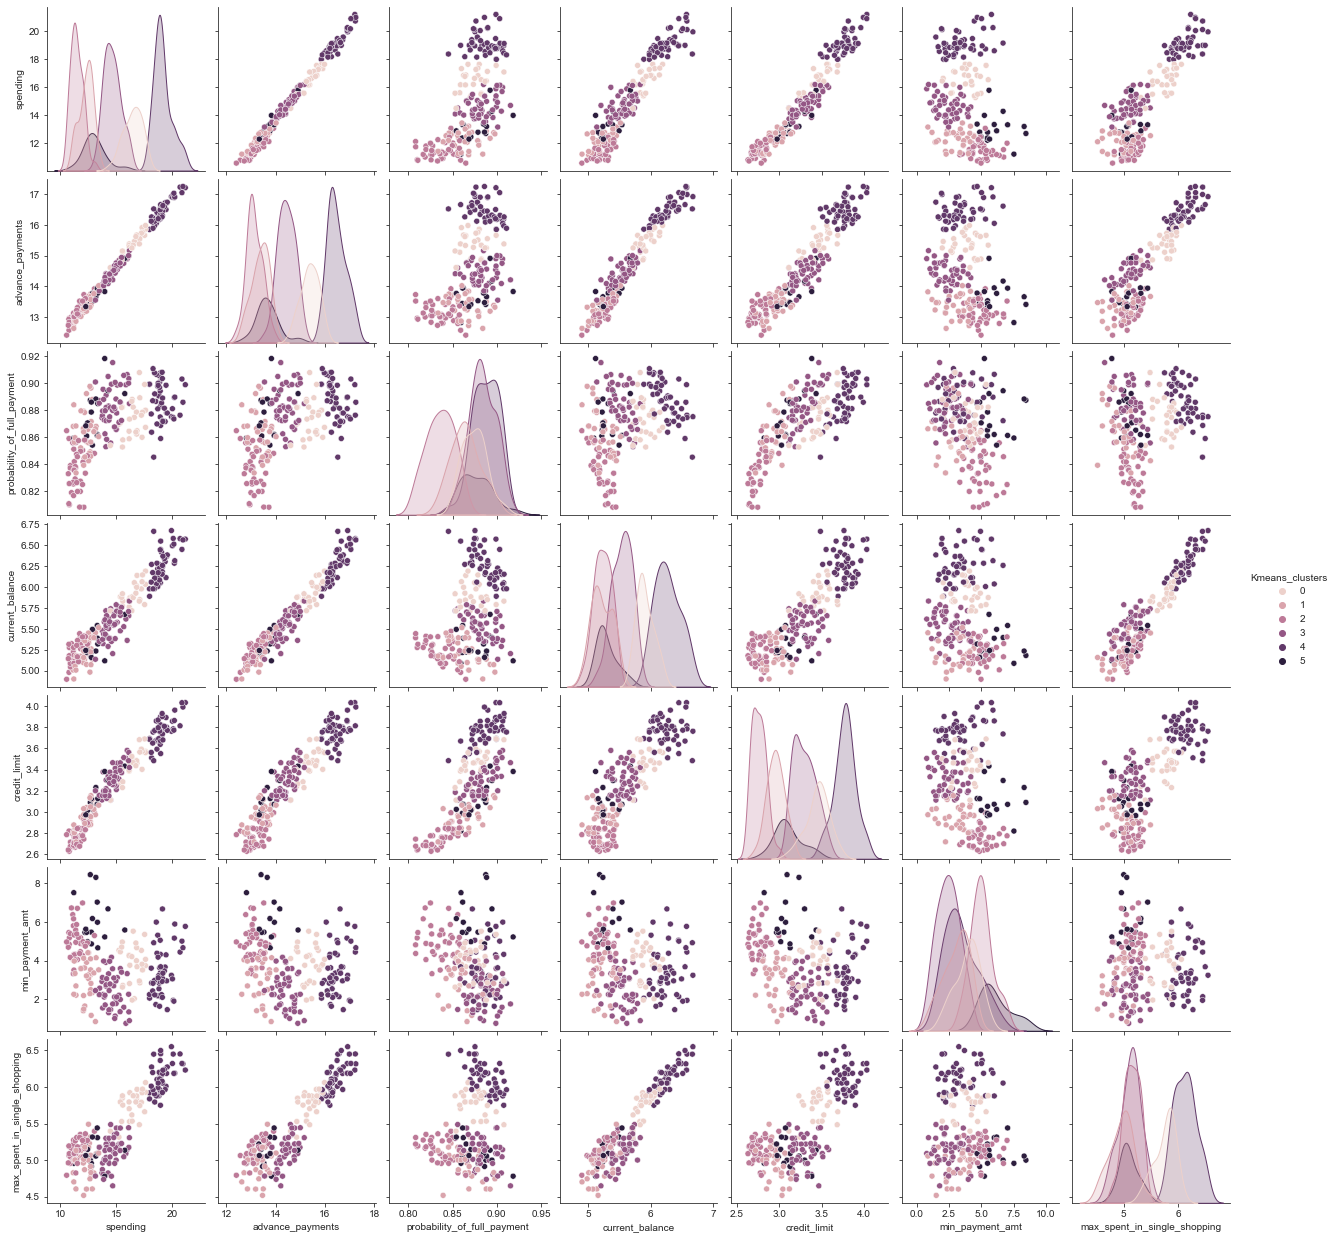

In [35]:
sns.pairplot(CustomerData.drop('H_clusters',axis=1), hue="Kmeans_clusters");
plt.show()

In [37]:
CustomerData.to_csv('Clusters1.csv')

In [38]:
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
 7   H_clusters                    210 non-null    int32  
 8   Kmeans_clusters               210 non-null    int32  
dtypes: float64(7), int32(2)
memory usage: 13.2 KB


## 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters

In [39]:
for i in range(1,7):
    newData = CustomerData[CustomerData.Kmeans_clusters == i-1]
    print('Cluster', i ,'describes group having average in spending(1000) is ', newData.spending.mean(), ', advance payments(100) is ', newData['advance_payments'].mean() ,', probability of full payment is ', newData['probability_of_full_payment'].mean(), ', current balance(1000) is', newData['current_balance'].mean(), ',credit limit(10000) is ', newData['credit_limit'].mean(), ', min payment amount(100) is ', newData['min_payment_amt'].mean() ,' and max spent in single shopping(1000) is ' ,newData['max_spent_in_single_shopping'].mean(),'.')

Cluster 1 describes group having average in spending(1000) is  16.458518518518517 , advance payments(100) is  15.374444444444444 , probability of full payment is  0.8744407407407411 , current balance(1000) is 5.908074074074071 ,credit limit(10000) is  3.4495925925925923 , min payment amount(100) is  3.8984444444444444  and max spent in single shopping(1000) is  5.755925925925926 .
Cluster 2 describes group having average in spending(1000) is  12.316875000000001 , advance payments(100) is  13.3759375 , probability of full payment is  0.8645968750000002 , current balance(1000) is 5.219281249999998 ,credit limit(10000) is  2.9548124999999996 , min payment amount(100) is  3.020253125000001  and max spent in single shopping(1000) is  4.9608750000000015 .
Cluster 3 describes group having average in spending(1000) is  11.485384615384614 , advance payments(100) is  13.137435897435898 , probability of full payment is  0.8359897435897435 , current balance(1000) is 5.228923076923078 ,credit limit

In [40]:
for i in range(1,4):
    newData = CustomerData[CustomerData.H_clusters == i]
    print('Cluster', i ,'describes group having average in spending(1000) is ', newData.spending.mean(), ', advance payments(100) is ', newData['advance_payments'].mean() ,', probability of full payment is ', newData['probability_of_full_payment'].mean(), ', current balance(1000) is', newData['current_balance'].mean(), ',credit limit(10000) is ', newData['credit_limit'].mean(), ', min payment amount(100) is ', newData['min_payment_amt'].mean() ,' and max spent in single shopping(1000) is ' ,newData['max_spent_in_single_shopping'].mean(),'.')

Cluster 1 describes group having average in spending(1000) is  18.371428571428567 , advance payments(100) is  16.14542857142857 , probability of full payment is  0.8844 , current balance(1000) is 6.15817142857143 ,credit limit(10000) is  3.684628571428572 , min payment amount(100) is  3.6391571428571434  and max spent in single shopping(1000) is  6.017371428571428 .
Cluster 2 describes group having average in spending(1000) is  11.872388059701493 , advance payments(100) is  13.257014925373136 , probability of full payment is  0.8480716417910452 , current balance(1000) is 5.238940298507461 ,credit limit(10000) is  2.8485373134328356 , min payment amount(100) is  4.949432835820894  and max spent in single shopping(1000) is  5.122208955223879 .
Cluster 3 describes group having average in spending(1000) is  14.199041095890408 , advance payments(100) is  14.233561643835612 , probability of full payment is  0.8791904109589038 , current balance(1000) is 5.478232876712326 ,credit limit(10000) 

# Problem 2: CART-RF-ANN
An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART & RF and compare the models' performances in train and test sets.


## 2.1. Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis)

In [41]:
InsurenceData = pd.read_csv('insurance_part2_data.csv')

In [42]:
InsurenceData.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [43]:
InsurenceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [44]:
InsurenceData[InsurenceData.duplicated() == True].count()

Age             139
Agency_Code     139
Type            139
Claimed         139
Commision       139
Channel         139
Duration        139
Sales           139
Product Name    139
Destination     139
dtype: int64

In [45]:
InsurenceData.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [46]:
InsurenceData[InsurenceData.Duration < 0]['Duration'] = 0

In [47]:
lstNumeric = list(InsurenceData.select_dtypes(exclude='object').columns)
lstNumeric

['Age', 'Commision', 'Duration', 'Sales']

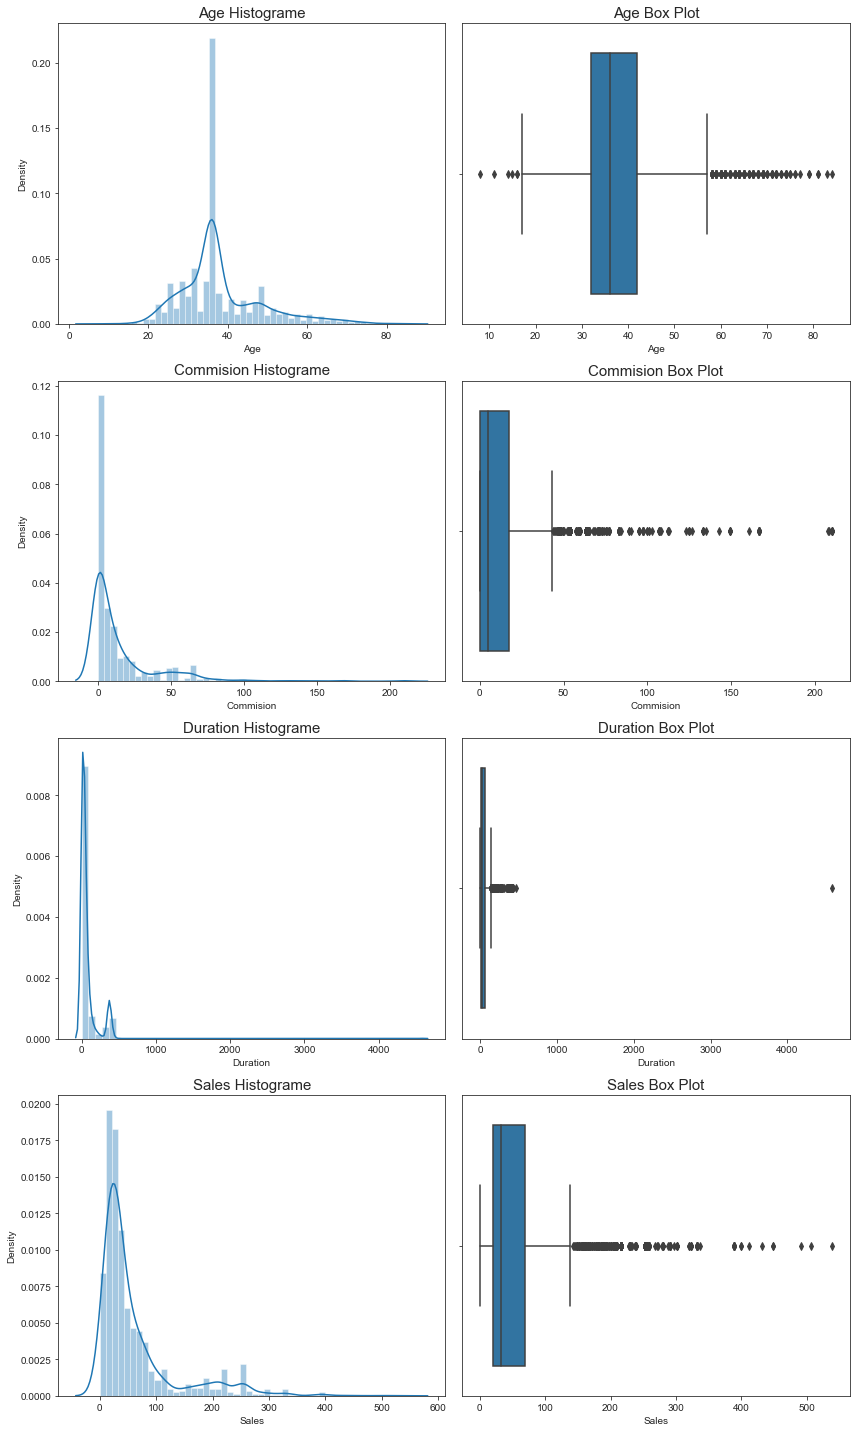

In [48]:
## Univariate except Name column
fig, axes = plt.subplots(nrows= len(lstNumeric),ncols=2)
fig.set_size_inches(12, 5*len(lstNumeric))
index = 0;
for i in lstNumeric:
    a = sns.distplot(InsurenceData[i] , ax=axes[index][0])
    a.set_title(i + ' Histograme',fontsize=15)
    a = sns.boxplot(InsurenceData[i] , ax=axes[index][1])
    a.set_title(i + ' Box Plot',fontsize=15)
    index = index+1
plt.tight_layout()
plt.show()

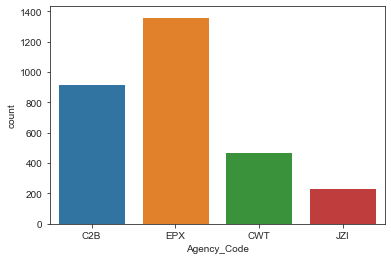

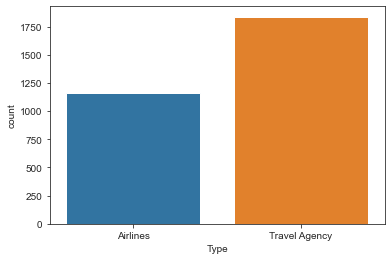

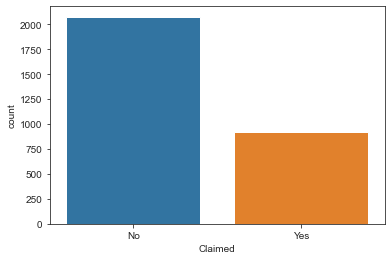

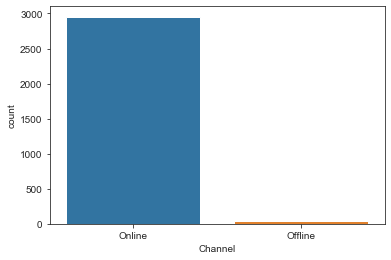

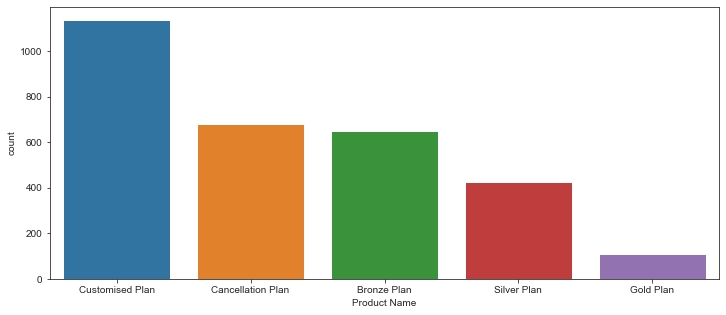

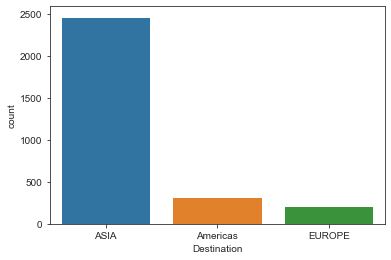

In [49]:
for col in InsurenceData[['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']]:
    try:
        if col=='Product Name':
            fig, ax = plt.subplots(figsize=(12,5))
            sns.countplot(data = InsurenceData, x = col, ax=ax)
            plt.show()
        else:
            sns.countplot(data = InsurenceData, x = col)
            plt.show()    
    except:
        pass

In [50]:
InsurenceData[lstNumeric].corr()

,Age,Commision,Duration,Sales
Age,1.000000,0.067717,0.030425,0.039455
Commision,0.067717,1.000000,0.471389,0.766505
Duration,0.030425,0.471389,1.000000,0.558930
Sales,0.039455,0.766505,0.558930,1.000000


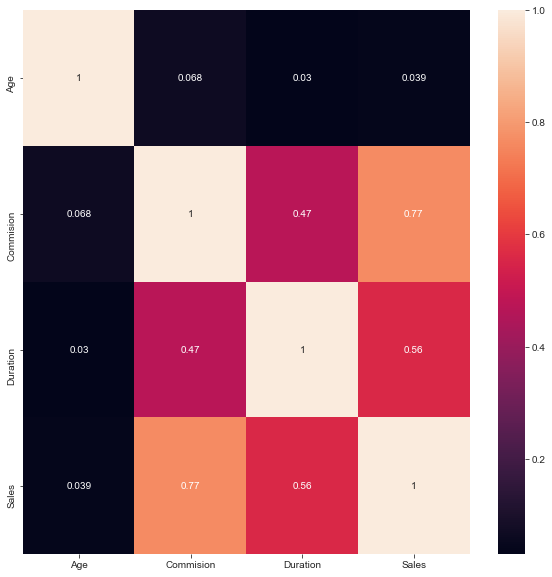

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(InsurenceData[lstNumeric].corr(),annot=True)
plt.show()

## 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest

### Converting all df objects to categorical values

In [52]:
for feature in InsurenceData.columns: 
    if InsurenceData[feature].dtype == 'object':
        InsurenceData[feature] = pd.Categorical(InsurenceData[feature]).codes

In [53]:
y = InsurenceData['Claimed']
X = InsurenceData.drop('Claimed',axis=1)

### Splitting data into training (70%) and test set (30%)

In [54]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1,stratify= y)

### Build classification model CART - Decision Tree

In [55]:
CART_model = DecisionTreeClassifier(criterion = 'gini',random_state=1)

In [56]:
CART_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [57]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print (pd.DataFrame(CART_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.203164
Agency_Code   0.216376
Type          0.002235
Commision     0.079865
Channel       0.003383
Duration      0.226625
Sales         0.207358
Product Name  0.040567
Destination   0.020429


In [58]:
y_predict = CART_model.predict(X_test)

In [59]:
CART_model.score(X_train,train_labels)

0.9957142857142857

In [60]:
CART_model.score(X_test,test_labels)

0.7144444444444444

#### Let's regularize it using the Grid_Search

In [61]:
params = {'criterion':['gini', 'entropy'],
         'max_depth':[3,4,5,6],
          'min_samples_split':list(range(1,20)),
         "min_samples_leaf":list(range(1,20))}
                                       
dt = DecisionTreeClassifier(random_state=1)

In [62]:
grid_Dec = GridSearchCV(dt,param_grid=params,refit=True,verbose=1)
grid_Dec.fit(X_train, train_labels)

Fitting 5 folds for each of 2888 candidates, totalling 14440 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19]},
             verbose=1)

In [63]:
grid_Dec.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 12}

In [64]:
reg_cart_model = DecisionTreeClassifier(criterion='gini',max_depth= 4,min_samples_leaf=1,min_samples_split=12)
reg_cart_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=4, min_samples_split=12)

In [65]:
print (pd.DataFrame(reg_cart_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.018348
Agency_Code   0.596525
Type          0.000000
Commision     0.033791
Channel       0.000000
Duration      0.052243
Sales         0.223383
Product Name  0.075710
Destination   0.000000


In [66]:
reg_cart_model.score(X_train,train_labels)

0.8076190476190476

In [67]:
reg_cart_model.score(X_test,test_labels)

0.7711111111111111

### Build a basic Random Forest model with random_state=1

In [68]:
RANDOM_Model = RandomForestClassifier(random_state=1)
RANDOM_Model.fit(X_train, train_labels)

RandomForestClassifier(random_state=1)

In [69]:
RANDOM_Model.score(X_train,train_labels)

0.9957142857142857

In [70]:
RANDOM_Model.score(X_test,test_labels)

0.7288888888888889

#### Let's regularize it using the Grid_Search

In [71]:
param_grid = {
    'max_depth': [5, 6, 7],
    'max_features': [4, 6, 7, 8],
    'min_samples_leaf': [50, 100, 150],
    'min_samples_split': [20, 50],
    'n_estimators': [301, 501, 701]
}

rfcl = RandomForestClassifier(random_state=1)

In [72]:
grid_random = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [74]:
grid_random.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 6, 7], 'max_features': [4, 6, 7, 8],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [20, 50],
                         'n_estimators': [301, 501, 701]})

In [75]:
grid_random.best_params_

{'max_depth': 5,
 'max_features': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 20,
 'n_estimators': 701}

In [76]:
reg_Random_model = grid_random.best_estimator_

In [77]:
reg_Random_model.score(X_train,train_labels)

0.7971428571428572

In [78]:
reg_Random_model.score(X_test,test_labels)

0.7522222222222222

## 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.

### CART Model

### Train

In [79]:
cart_train_acc = reg_cart_model.score(X_train,train_labels) 
print('Train Accuracy:', cart_train_acc)

Train Accuracy: 0.8076190476190476


### confusion_matrix for training data

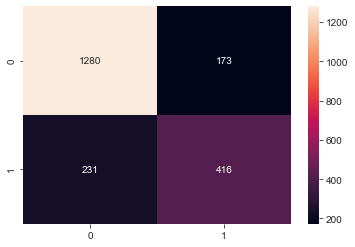

In [80]:
ytrain_predict = reg_cart_model.predict(X_train)
sns.heatmap(confusion_matrix(train_labels, ytrain_predict),annot=True,fmt='.4g');

### ROC

AUC Train dataset: 0.834


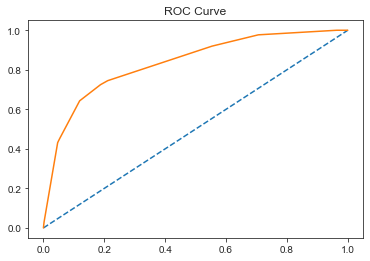

In [81]:
probs_cart = reg_cart_model.predict_proba(X_train)
probs_cart = probs_cart[:, 1]
cart_train_auc = roc_auc_score(train_labels, probs_cart)
print('AUC Train dataset: %.3f' % cart_train_auc)
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr)
plt.title('ROC Curve')
plt.show()

In [82]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1453
           1       0.71      0.64      0.67       647

    accuracy                           0.81      2100
   macro avg       0.78      0.76      0.77      2100
weighted avg       0.80      0.81      0.80      2100



### Test

In [83]:
cart_test_acc = reg_cart_model.score(X_test,test_labels) 
print('Test Accuracy:', cart_test_acc)

Test Accuracy: 0.7711111111111111


### confusion_matrix for test data

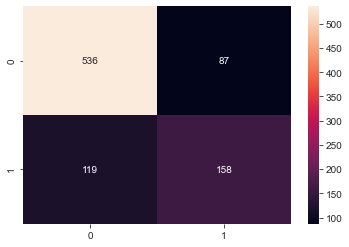

In [84]:
ytest_predict = reg_cart_model.predict(X_test)
sns.heatmap(confusion_matrix(test_labels, ytest_predict),annot=True,fmt='.4g');

### ROC

AUC Test dataset: 0.775


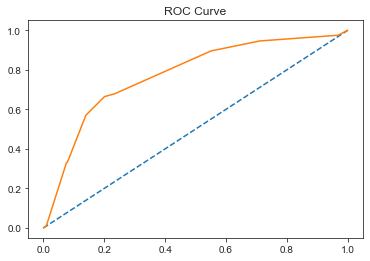

In [85]:
probs_cart = reg_cart_model.predict_proba(X_test)
probs_cart = probs_cart[:, 1]
cart_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC Test dataset: %.3f' % cart_test_auc)
cart_test_fpr, cart_test_tpr, cart_test_thresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr)
plt.title('ROC Curve')
plt.show()

In [86]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       623
           1       0.64      0.57      0.61       277

    accuracy                           0.77       900
   macro avg       0.73      0.72      0.72       900
weighted avg       0.76      0.77      0.77       900



### Random Forest Model

### Train

In [87]:
rf_train_acc = reg_Random_model.score(X_train,train_labels) 
print('Train Accuracy:', rf_train_acc)

Train Accuracy: 0.7971428571428572


### confusion_matrix for training data

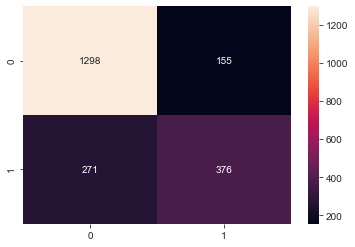

In [88]:
ytrain_predict = reg_Random_model.predict(X_train)
sns.heatmap(confusion_matrix(train_labels, ytrain_predict),annot=True,fmt='.4g');

### ROC

AUC Train dataset: 0.839


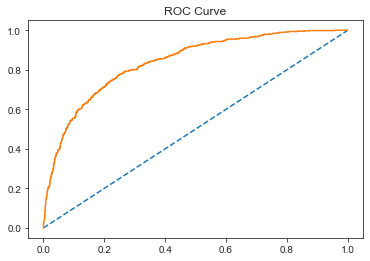

In [89]:
probs_random = reg_Random_model.predict_proba(X_train)
probs_random = probs_random[:, 1]
random_train_auc = roc_auc_score(train_labels, probs_random)
print('AUC Train dataset: %.3f' % random_train_auc)
random_train_fpr, random_train_tpr, random_train_thresholds = roc_curve(train_labels, probs_random)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(random_train_fpr, random_train_tpr)
plt.title('ROC Curve')
plt.show()

In [90]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1453
           1       0.71      0.58      0.64       647

    accuracy                           0.80      2100
   macro avg       0.77      0.74      0.75      2100
weighted avg       0.79      0.80      0.79      2100



### Test

In [91]:
rf_test_acc = reg_Random_model.score(X_test,test_labels) 
print('Test Accuracy:', rf_test_acc)

Test Accuracy: 0.7522222222222222


### confusion_matrix for test data

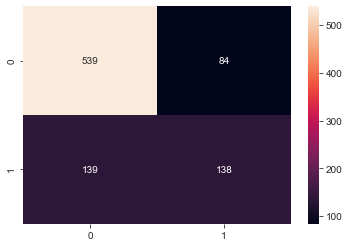

In [92]:
ytest_predict = reg_Random_model.predict(X_test)
sns.heatmap(confusion_matrix(test_labels, ytest_predict),annot=True,fmt='.4g');

### ROC

AUC Test dataset: 0.799


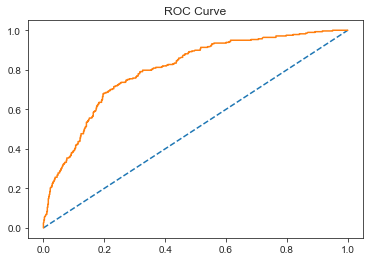

In [93]:
probs_random = reg_Random_model.predict_proba(X_test)
probs_random = probs_random[:, 1]
random_test_auc = roc_auc_score(test_labels, probs_random)
print('AUC Test dataset: %.3f' % random_test_auc)
random_test_fpr, random_test_tpr, random_test_thresholds = roc_curve(test_labels, probs_random)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(random_test_fpr, random_test_tpr)
plt.title('ROC Curve')
plt.show()

In [94]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       623
           1       0.62      0.50      0.55       277

    accuracy                           0.75       900
   macro avg       0.71      0.68      0.69       900
weighted avg       0.74      0.75      0.74       900



## 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

### Comparing Accuracies and AUC from all the models for Train and Test Sets.

In [95]:
index=['Accuracy', 'AUC']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc],
        'CART Test':[cart_test_acc,cart_test_auc],
       'Random Forest Train':[rf_train_acc,random_train_auc],
        'Random Forest Test':[rf_test_acc,random_test_auc]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test
Accuracy,0.81,0.77,0.80,0.75
AUC,0.83,0.78,0.84,0.80


## 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations